# Deep Learning für Ingenieure WS25/26

**Programming tasks**

## Task 1: Agricultural Sciences and Harvest

As an agricultural scientist, you want to develop a model that can predict the harvest yield of a specific field based on applied fertilizer (in kilograms per hectare) and the average precipitation during the growing season (in millimeters). Your research focuses on optimizing agricultural yields through predictive models.

**Problem statement**

- Load the file `harvest.csv`.
- Print the first 5 rows of the dataset to the command line.
- Write a Python program `p1_regression` that visualizes the data as follows. Use the libraries `pandas`, `numpy`, `matplotlib`, `mpl_toolkits.mplot3d`.
- Use `seaborn` to display the pairwise relationships between the following variables in `p1_regression`. Use the libraries `pandas`, `numpy`, `matplotlib`, `mpl_toolkits.mplot3d`.
- Randomize the dataset. Split the data in `p2_regression` into training and test data (80% training, 20% test). Create a model in Keras with 2 hidden layers, each with 4 nodes and ReLU activation. Use Mean Squared Error as the loss function, and the Adam optimizer. Train the model for 100 epochs, with a batch size of 50.
- Plot the loss curves for training and test.
- Plot the model and the data (separated by test and training data).
- Finally compute the model’s predicted values for the following input pairs: Precipitation/Fertilizer: [0.25, 0.25], [0.85, 0.75].

In [1]:
# Imports
import keras
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import tensorflow as tf

# Show python, tensorflow and keras versions
print("Python version:     ", sys.version)
print("TensorFlow version: ", tf.__version__)
print("Keras version:      ", keras.__version__)

d:\Python\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Python version:      3.13.3 (tags/v3.13.3:6280bb5, Apr  8 2025, 14:47:33) [MSC v.1943 64 bit (AMD64)]
TensorFlow version:  2.20.0
Keras version:       3.13.0


### Load CSV and display first rows

In [2]:
# Load harvest.csv as a DataFrame
harvest_df = pd.read_csv('harvest.csv')

# Display the first five rows of the DataFrame
print(harvest_df.head(5))

     Dünger  Niederschlag    Ertrag
0  0.374540      0.950714  3.042819
1  0.731994      0.598658  3.259764
2  0.156019      0.155995  0.818065
3  0.058084      0.866176  1.967662
4  0.601115      0.708073  3.275469


### Visualize the data in a 3D-plot

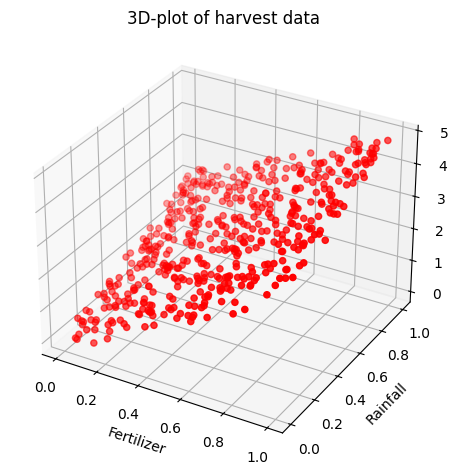

In [3]:
# Create figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot
ax.scatter(harvest_df['Dünger'], harvest_df['Niederschlag'], harvest_df['Ertrag'], c='r', marker='o')

# Options
ax.set_xlabel('Fertilizer')
ax.set_ylabel('Rainfall')
ax.set_zlabel('Yield')

ax.set_title('3D-plot of harvest data')

plt.tight_layout()
plt.show()

### Show pair plots, using seaborn

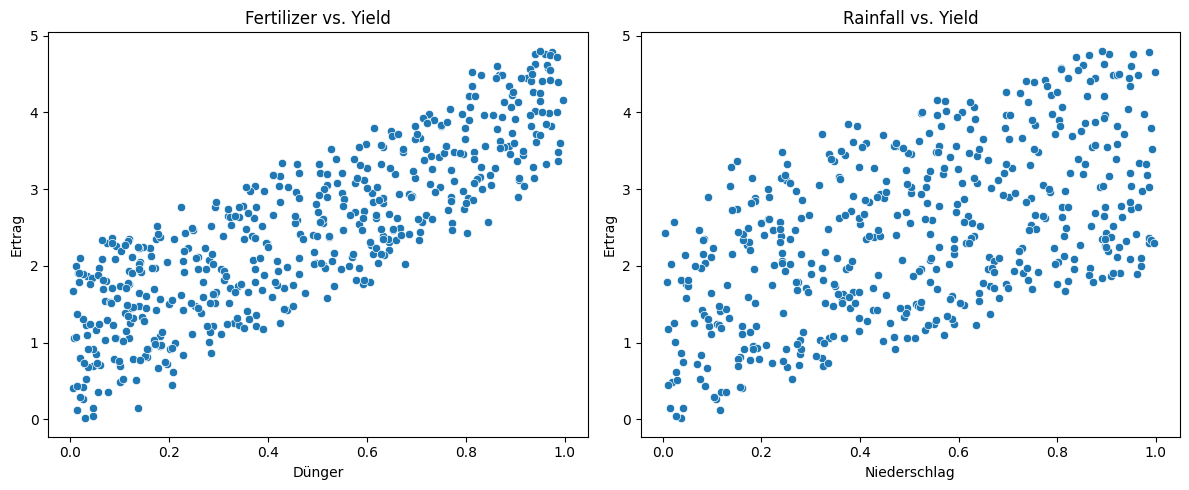

In [4]:
# Create subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot
sns.scatterplot(data=harvest_df, x='Dünger', y='Ertrag', ax=axes[0])
sns.scatterplot(data=harvest_df, x='Niederschlag', y='Ertrag', ax=axes[1])

# Options
axes[0].set_title('Fertilizer vs. Yield')
axes[1].set_title('Rainfall vs. Yield')
plt.tight_layout()
plt.show()

From the plots above we can see that both fertilizer and rainfall show a correlation with the yield.

The model should be able to make predictions on the yield based on these two features.

### Randomising the dataset, creating training- and test-data

In [5]:
# Randomize dataset and split into training and test sets
train_dataset = harvest_df.sample(frac=0.8, random_state=0)
test_dataset = harvest_df.drop(train_dataset.index)

# Split features and labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Ertrag')
test_labels = test_features.pop('Ertrag')

# Display mean and standard deviation of training features
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Dünger,0.465685,0.296174
Niederschlag,0.512570,0.286376
Ertrag,2.436352,1.060531


### Creating and training the model
`plot_loss()` adapted from the [TensorFlow Regression Tutorial](https://www.tensorflow.org/tutorials/keras/regression)

In [6]:
# Define a function to plot loss curves
def plot_loss(history):
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Test Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.tight_layout()

**Note:**

In order for `summary()` to show the output shape and number of parameters, it was necassary to add an input layer, that defines the number of inputs.

This layer is not necassary for the training of the model itself.

In [7]:
# Define the model
harvest_model = keras.Sequential([
    keras.layers.InputLayer(shape=(2,)),
    keras.layers.Dense(units=4, activation='relu'),
    keras.layers.Dense(units=4, activation='relu'),
    keras.layers.Dense(units=1)
])

# Compile the model
harvest_model.compile(optimizer='adam', loss='mean_squared_error')
harvest_model.summary()

# Train the model with 100 epochs and a batch size of 50
history = harvest_model.fit(
    train_features,
    train_labels,
    epochs=100,
    batch_size=50,
    validation_split=0.2,
    verbose=0
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

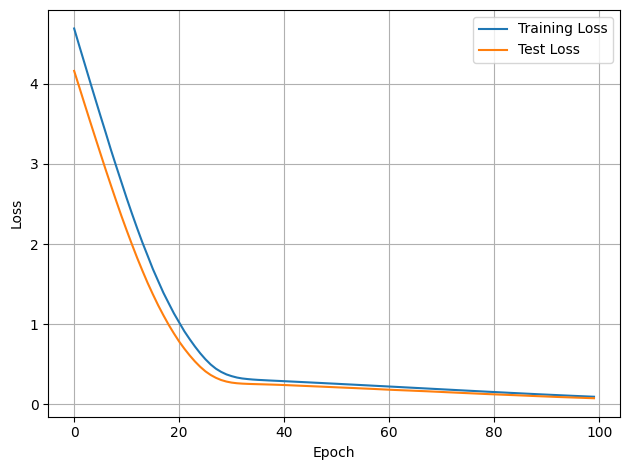

In [8]:
# Plot the loss curves
plot_loss(history)
plt.show()

The loss curve shows a declining loss with convergence. The model seems to be trained well.

### Plotting model and data (split by test- and training-data)

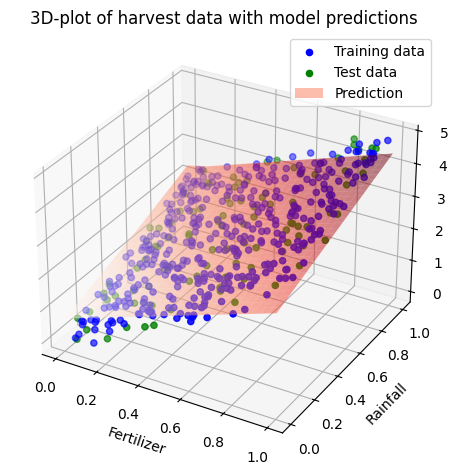

In [9]:
# Create 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot
ax.scatter(train_dataset['Dünger'], train_dataset['Niederschlag'], train_dataset['Ertrag'], c='b', marker='o')
ax.scatter(test_dataset['Dünger'], test_dataset['Niederschlag'], test_dataset['Ertrag'], c='g', marker='o')

# MODEL PREDICTIONS: Create prediction surface/mesh
# Generate grid for predictions
fertilizer_range = np.linspace(train_dataset['Dünger'].min(), train_dataset['Dünger'].max(), 30)
rainfall_range = np.linspace(train_dataset['Niederschlag'].min(), train_dataset['Niederschlag'].max(), 30)
fertilizer_grid, rainfall_grid = np.meshgrid(fertilizer_range, rainfall_range)

# Reshape grid for model prediction (model expects 2D input: [samples, features])
grid_input = np.column_stack([fertilizer_grid.ravel(), rainfall_grid.ravel()])
grid_predictions = harvest_model.predict(grid_input, verbose=0).flatten()

# Reshape predictions back to grid shape
Z_pred = grid_predictions.reshape(fertilizer_grid.shape)

# Plot model prediction surface
ax.plot_surface(fertilizer_grid, rainfall_grid, Z_pred, alpha=0.5, cmap='Reds', linewidth=0)

# Options
ax.set_xlabel('Fertilizer')
ax.set_ylabel('Rainfall')
ax.set_zlabel('Yield')
ax.set_title('3D-plot of harvest data with model predictions')


ax.legend(['Training data', 'Test data', 'Prediction'])
plt.tight_layout()
plt.show()

### Make predictions based on given value-pairs

In [10]:
# Define input value-pairs
input_1 = np.array([[0.25, 0.25]])
input_2 = np.array([[0.85, 0.75]])

# Make predictions
prediction_1 = harvest_model.predict(input_1, verbose=0)
prediction_2 = harvest_model.predict(input_2, verbose=0)

# Print results
print(f'Prediction for Fertilizer={input_1[0][0]}, Rainfall={input_1[0][1]}: Yield={prediction_1[0][0]:.4f}')
print(f'Prediction for Fertilizer={input_2[0][0]}, Rainfall={input_2[0][1]}: Yield={prediction_2[0][0]:.4f}')

Prediction for Fertilizer=0.25, Rainfall=0.25: Yield=1.6124
Prediction for Fertilizer=0.85, Rainfall=0.75: Yield=3.7139


## Task 2: Thin-billed Gulls and Bighorn Sheep

Distinguishing between thin-billed gulls and bighorn sheep presents an interesting and relevant challenge in biological research and nature conservation. These two species are not only ecologically significant but also fascinating in their behavior and habitats. The ability to differentiate between them is therefore essential for further professional development.

**Problem statement**

- Load the file `animals.csv`.
- Print the first 5 rows of the dataset to the command line.
- Write a Python program `p1_classification` that visualizes the data as follows. Use the libraries `pandas` and `matplotlib`.
- Randomize the dataset. Encode the labels as numeric values so they can be processed by TensorFlow. Split the data in `p2_classification` into training and test data (80% training, 20% test). Create a model in Keras with 2 hidden layers, each with 4 nodes and ReLU activation. The output node should use the sigmoid activation function. Use Binary Cross Entropy as the loss function and the Adam optimizer. Train the model for 50 (or more) epochs with a batch size of 100.
- Plot the loss function for training and test. How does the progression differ between few and many epochs?
- Plot the learned model and the test data using `matplotlib`’s `contourf` and `scatter`.
- Finally compute the model’s predicted values for the following input pairs: Circumference/Size: [90, 90], [70, 70].

In [32]:
# Imports
import keras
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import sys
import tensorflow as tf


# Show python, tensorflow and keras versions
print("Python version:     ", sys.version)
print("TensorFlow version: ", tf.__version__)
print("Keras version:      ", keras.__version__)

Python version:      3.13.3 (tags/v3.13.3:6280bb5, Apr  8 2025, 14:47:33) [MSC v.1943 64 bit (AMD64)]
TensorFlow version:  2.20.0
Keras version:       3.13.0


### Load CSV and display first rows

In [33]:
# Load animals.csv as a DataFrame
animals_df = pd.read_csv('animals.csv')

# Display the first five rows of the DataFrame
print(animals_df.head(5))

      Groesse      Umfang               Label
0   94.981605  118.028572  Duennschnabelmoewe
1  109.279758  103.946339  Duennschnabelmoewe
2   86.240746   86.239781  Duennschnabelmoewe
3  104.044600  108.322903  Duennschnabelmoewe
4  113.297706   88.493564  Duennschnabelmoewe


### Visualize the data

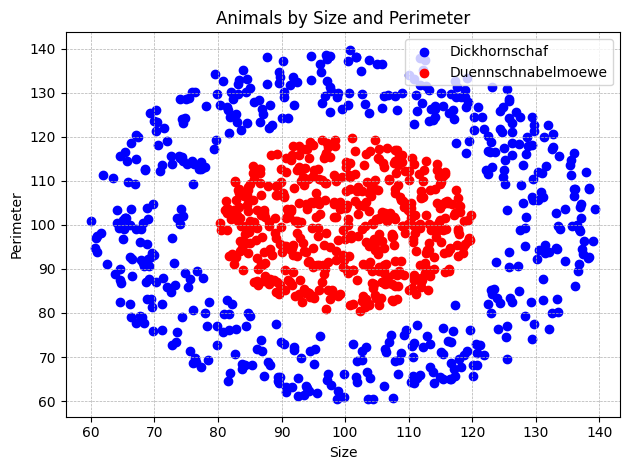

In [34]:
# Create figure
fig, ax = plt.subplots()

# Plot based on label
for label, group in animals_df.groupby('Label'):
    color = 'red' if label == 'Duennschnabelmoewe' else 'blue'
    ax.scatter(group['Groesse'], group['Umfang'], c=color, label=label)

# Options
ax.set_xlabel('Size')
ax.set_ylabel('Perimeter')
ax.set_title('Animals by Size and Perimeter')
ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend(loc='best')

plt.tight_layout()
plt.show()

From the plot above, it appears that the two animal species can be separated well using a circular decision boundary.

In order for the model to learn this non-linear decision boundary we will have to make use of activation functions (ReLu, sigmoid, ...) and multiple layers.

### Randomising the dataset, convert labels to numerical values and creating training- and test-data

In [35]:
# Converting labels to numerical values
animals_df['Label'] = animals_df['Label'].map({'Duennschnabelmoewe': 0, 'Dickhornschaf': 1})

# Display 5 random rows of the modified dataframe
print(animals_df.sample(n=5))

        Groesse      Umfang  Label
975   93.541733   61.449923      1
857  106.263872   71.757017      1
813  138.318489  108.279448      1
913   64.526852   89.913684      1
303   90.071962   93.827840      0


In [36]:
# Randomize dataset and split into training and test sets
train_dataset = animals_df.sample(frac=0.8, random_state=0)
test_dataset = animals_df.drop(train_dataset.index)

# Split features and labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Label')
test_labels = test_features.pop('Label')

# Display mean and standard deviation of training features
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Groesse,100.147497,18.312853
Umfang,100.496178,18.170979
Label,0.501250,0.500311


### Creating and training the model(s)

**Note:** It was necassary to define a normalization layer here!

Without normalization the models were not able to learn properly.
The accuracy was ~50% regardless of the number of epochs. Adding more layers or nodes also did not improve training.
In the last plot for the decision boundaries the models always seemed to produce a linear decision boundary, but never a circle.

Only adding normalization was able to fix these problems.

In [37]:
# Define the model for shorter training
normalizer = keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

animal_model_1 = keras.Sequential([
    keras.layers.InputLayer(shape=(2,)),
    normalizer,
    keras.layers.Dense(units=4, activation='relu'),
    keras.layers.Dense(units=4, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
animal_model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
animal_model_1.summary()

# Train the model
history_1 = animal_model_1.fit(
    train_features,
    train_labels,
    epochs=50,
    batch_size=100,
    validation_split=0.2,
    verbose=0
)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 2)              │             5 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (172.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 5 (24.00 B)

In [38]:
# Evaluate the model on the test set
test_loss_1, test_accuracy_1 = animal_model_1.evaluate(test_features, test_labels, verbose=2)
print(f'Test Loss (50 epochs): {test_loss_1:.4f}')
print(f'Test Accuracy (50 epochs): {test_accuracy_1:.4f}')

7/7 - 0s - 10ms/step - accuracy: 0.6850 - loss: 0.5823
Test Loss (50 epochs): 0.5823
Test Accuracy (50 epochs): 0.6850


The accuracy of the model after training for 50 epochs is still quite low and the loss rather high. This already indicates that the model has not fully converged and could benefit from further training.

In [39]:
# Define the model for longer training
animal_model_2 =keras.Sequential([
    keras.layers.InputLayer(shape=(2,)),
    normalizer,
    keras.layers.Dense(units=4, activation='relu'),
    keras.layers.Dense(units=4, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
animal_model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
animal_model_2.summary()

# Train the model
history_2 = animal_model_2.fit(
    train_features,
    train_labels,
    epochs=500,
    batch_size=100,
    validation_split=0.2,
    verbose=0
)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 2)              │             5 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (172.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 5 (24.00 B)

In [40]:
# Evaluate the model on the test set
test_loss_2, test_accuracy_2 = animal_model_2.evaluate(test_features, test_labels, verbose=2)
print(f'Test Loss (500 epochs): {test_loss_2:.4f}')
print(f'Test Accuracy (500 epochs): {test_accuracy_2:.4f}')

7/7 - 0s - 6ms/step - accuracy: 1.0000 - loss: 0.0090
Test Loss (500 epochs): 0.0090
Test Accuracy (500 epochs): 1.0000


After training the model for 500 epochs, we observe a significant improvement in the accuracy. The model is now better able to distinguish between the two animal classes.
    
The loss also declined further.

### Plotting the loss function for training and test
`plot_loss()` adapted from the [TensorFlow Regression Tutorial](https://www.tensorflow.org/tutorials/keras/regression)

In [41]:
# Define a function to plot loss curves
def plot_loss(history, ax: plt.Axes=None):
  ax.plot(history.history['loss'], label='Training Loss')
  ax.plot(history.history['val_loss'], label='Test Loss')
  ax.set_xlabel('Epoch')
  ax.set_ylabel('Loss')
  ax.set_title('Model Loss')
  ax.legend()
  ax.grid(True)


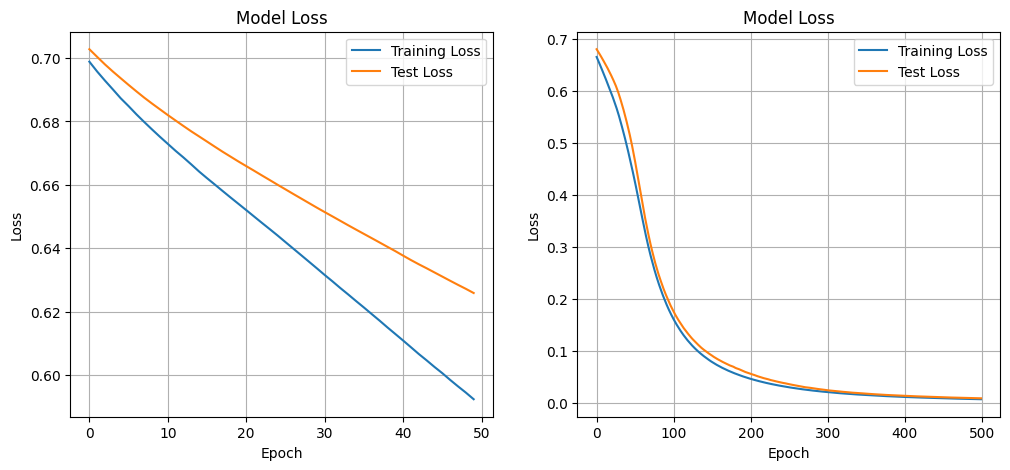

In [42]:
# Create subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the loss curves
plot_loss(history_1, ax=axes[0])
plot_loss(history_2, ax=axes[1])
plt.show()

The loss curves for the model trained with 50 epochs on the left show a declining trend but the model is not fully converged yet.

The model trained with 500 epochs on the right side shows a converging loss curve towards the end, indicating better training.

The trade-off is the longer training time for the model with higher number of epochs (~6sec vs. ~50sec).

### Plotting the model and test data

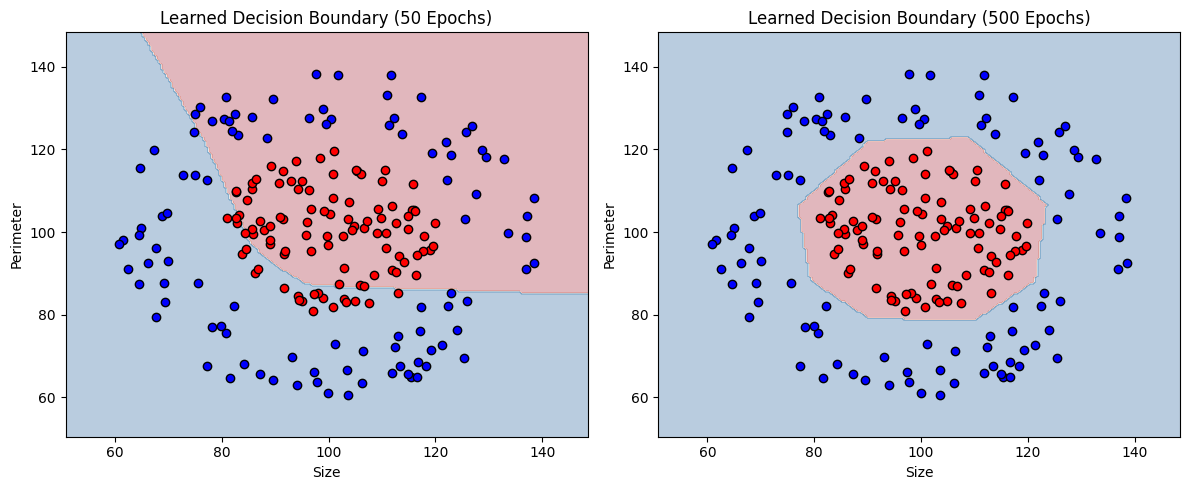

In [45]:
# Plotting model decision boundaries and test data points using contourf and scatter
def plot_decision_boundary(model, features, labels, ax, title):
    # Create a grid of points
    x_min, x_max = features['Groesse'].min() - 10, features['Groesse'].max() + 10
    y_min, y_max = features['Umfang'].min() - 10, features['Umfang'].max() + 10
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Predict on the grid points
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points, verbose=0)
    Z = (Z > 0.5).astype(int).ravel().reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')

    # Plot test data points
    for label in np.unique(labels):
        idx = labels == label
        color = 'red' if label == 0 else 'blue'
        ax.scatter(features['Groesse'][idx], features['Umfang'][idx], c=color, edgecolor='k')

    ax.set_xlabel('Size')
    ax.set_ylabel('Perimeter')
    ax.set_title(title)

# Create subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Plot decision boundaries
plot_decision_boundary(animal_model_1, test_features, test_labels, axes[0], 'Learned Decision Boundary (50 Epochs)')
plot_decision_boundary(animal_model_2, test_features, test_labels, axes[1], 'Learned Decision Boundary (500 Epochs)')
plt.tight_layout()
plt.show()

The decision boundary for the model trained with 50 epochs show that the model did not yet have enough time to learn the decision boundaries effectively.

The model trained with 500 epochs shows a circle for the separation between the two classes, indicating that it has learned the decision boundaries better.

### Make predictions based on given value-pairs

In [46]:
# Define input value-pairs
input_1 = np.array([[90.0, 90.0]])
input_2 = np.array([[70.0, 70.0]])

# Make predictions
prediction_1 = animal_model_2.predict(input_1, verbose=0)
prediction_2 = animal_model_2.predict(input_2, verbose=0)

# Print results
print(f'Prediction for Input {input_1[0]}: {prediction_1[0][0]:.4f}, {'Dickhornschaf' if prediction_1[0][0]>=0.5 else 'Duennschnabelmoewe'}')
print(f'Prediction for Input {input_2[0]}: {prediction_2[0][0]:.4f}, {'Dickhornschaf' if prediction_2[0][0]>=0.5 else 'Duennschnabelmoewe'}')

Prediction for Input [90. 90.]: 0.0015, Duennschnabelmoewe
Prediction for Input [70. 70.]: 1.0000, Dickhornschaf
